In [1]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import NearestCentroid
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import KFold, GridSearchCV, StratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV

import mlflow
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


import os
import warnings
import math

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df_eda = df.copy()
df_eda["SeniorCitizen"] = df_eda["SeniorCitizen"].map({0: "Young", 1: "Senior"})
df_eda["Churn"] = df_eda["Churn"].map({0: "Not Churn", 1: "Churn"})

In [4]:
# check unique values of each column
for column in df.drop(["customerID"], axis=1).columns:
    print('Column: {} |---| Variable type: {} |---| Unique values: {} |---| Null values: {}'.format(column, df[column].dtype, df[column].unique(), df[column].isnull().sum()))

Column: gender |---| Variable type: object |---| Unique values: ['Female' 'Male'] |---| Null values: 0
Column: SeniorCitizen |---| Variable type: int64 |---| Unique values: [0 1] |---| Null values: 0
Column: Partner |---| Variable type: object |---| Unique values: ['Yes' 'No'] |---| Null values: 0
Column: Dependents |---| Variable type: object |---| Unique values: ['No' 'Yes'] |---| Null values: 0
Column: tenure |---| Variable type: int64 |---| Unique values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] |---| Null values: 0
Column: PhoneService |---| Variable type: object |---| Unique values: ['No' 'Yes'] |---| Null values: 0
Column: MultipleLines |---| Variable type: object |---| Unique values: ['No phone service' 'No' 'Yes'] |---| Null values: 0
Column: InternetService |---| Variable type: object |---| Uniqu

In [5]:
# Converting Total Charges to a numerical data type.
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')

# Remove if total charges is 0 (new client with one year or two years contract only)
df = df[~df["TotalCharges"].isnull()]

# Remove Customer ID Column (first column)
df = df.iloc[:,1:]

In [6]:
#Convertin the predictor variable in a binary numeric variable
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

# Start of EDA

## One Hot Encoder

In [7]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod', 'gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService']


In [8]:
encoded_df = pd.get_dummies(df, columns = one_hot_encoding_columns).astype(float)

In [9]:
encoded_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PhoneService_No,PhoneService_Yes
0,0.00,1.00,29.85,29.85,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00
1,0.00,34.00,56.95,1889.50,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00
2,0.00,2.00,53.85,108.15,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00
3,0.00,45.00,42.30,1840.75,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00
4,0.00,2.00,70.70,151.65,1.00,1.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.00,24.00,84.80,1990.50,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
7039,0.00,72.00,103.20,7362.90,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,1.00
7040,0.00,11.00,29.60,346.45,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00
7041,1.00,4.00,74.40,306.60,1.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00


## Feature Importance

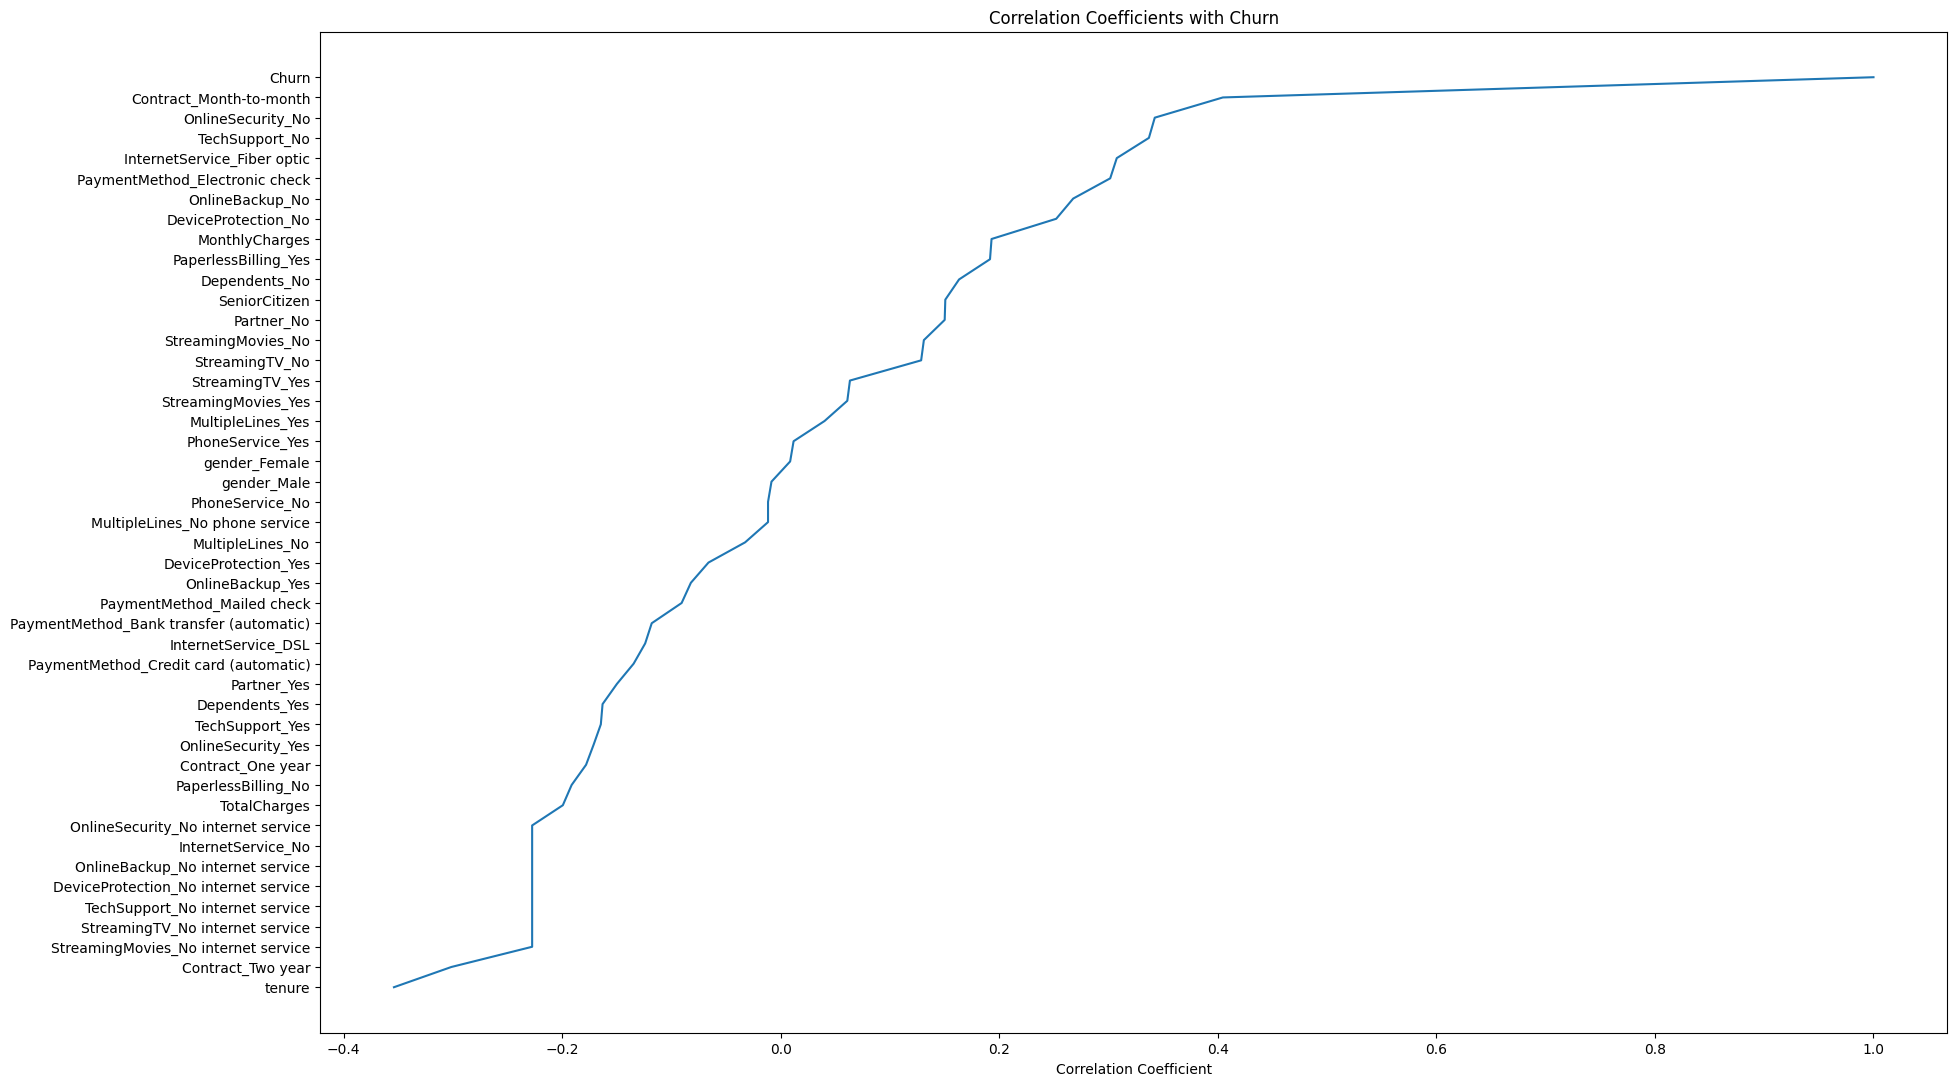

In [10]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(21,13))
corr = encoded_df.corr()["Churn"].sort_values(ascending = True)

# Create a line plot
plt.plot(corr.values, corr.index)

# Set the chart title and axis labels
plt.title('Correlation Coefficients with Churn')
plt.xlabel('Correlation Coefficient')


# Show the plot
plt.show()

## Churn Distribution

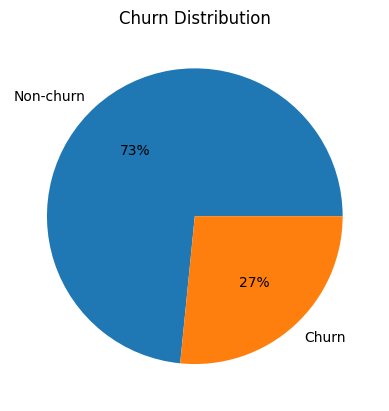

In [11]:
plt.pie(df["Churn"].value_counts(), labels=["Non-churn", "Churn"], autopct="%1.0f%%")
plt.title("Churn Distribution")
plt.show()

It is difficult to give an exact percentage range for the distribution of Churn as it can vary widely. However, as a rule of thumb, a telecom company with a churn rate below 5% is considered to have a good churn rate, while a churn rate above 10% is considered high.

As shown below, this is an imbalanced data set because both classes are not equally distributed among all observations, being no the majority class (73.42%). When modeling, this imbalance will lead to a large number of false negatives, as we will see later.

## Gender Distribution

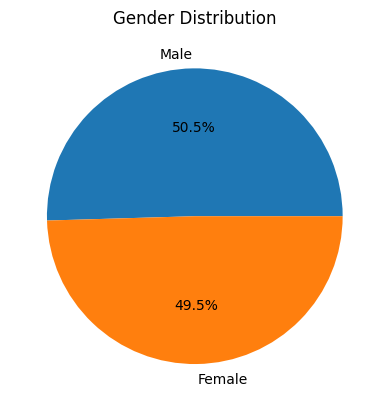

In [12]:
plt.pie(df["gender"].value_counts(), labels=["Male", "Female"], autopct="%1.01f%%")
plt.title("Gender Distribution")
plt.show()

## Senior Citizen Distribution

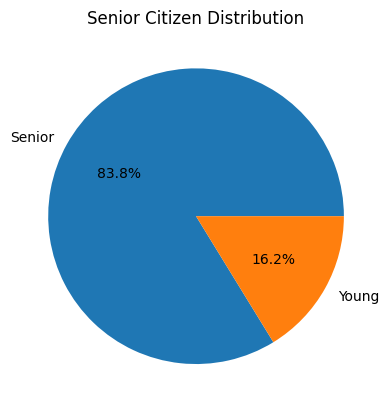

In [13]:
plt.pie(df["SeniorCitizen"].value_counts(), labels=["Senior", "Young"], autopct="%1.01f%%")
plt.title("Senior Citizen Distribution")
plt.show()

## Dependents Distribution

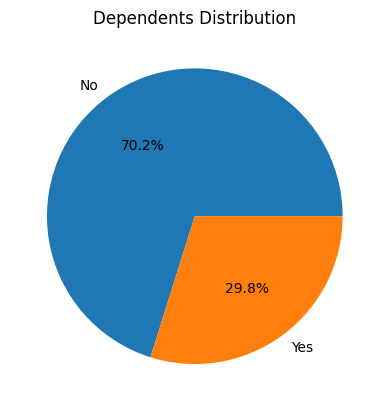

In [14]:
plt.pie(df["Dependents"].value_counts(), labels=["No", "Yes"], autopct="%1.01f%%")
plt.title("Dependents Distribution")
plt.show()

## Partner Distribution

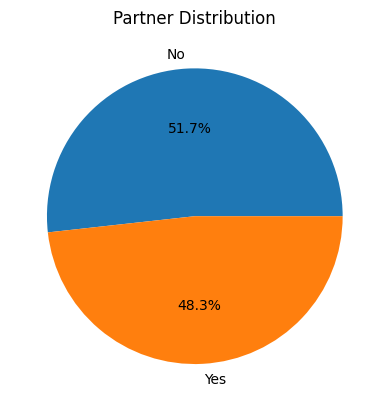

In [15]:
plt.pie(df["Partner"].value_counts(), labels=["No", "Yes"], autopct="%1.01f%%")
plt.title("Partner Distribution")
plt.show()

In [16]:
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(16, 6 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(df_eda[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0)

#         # set the legend in the upper right corner
#         ax.legend(["Not Churn", "Churn"], loc="upper left",
#                   title='Churn')

        # set title and labels
        ax.set_title(column + " by churn",
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

## Demographic Information

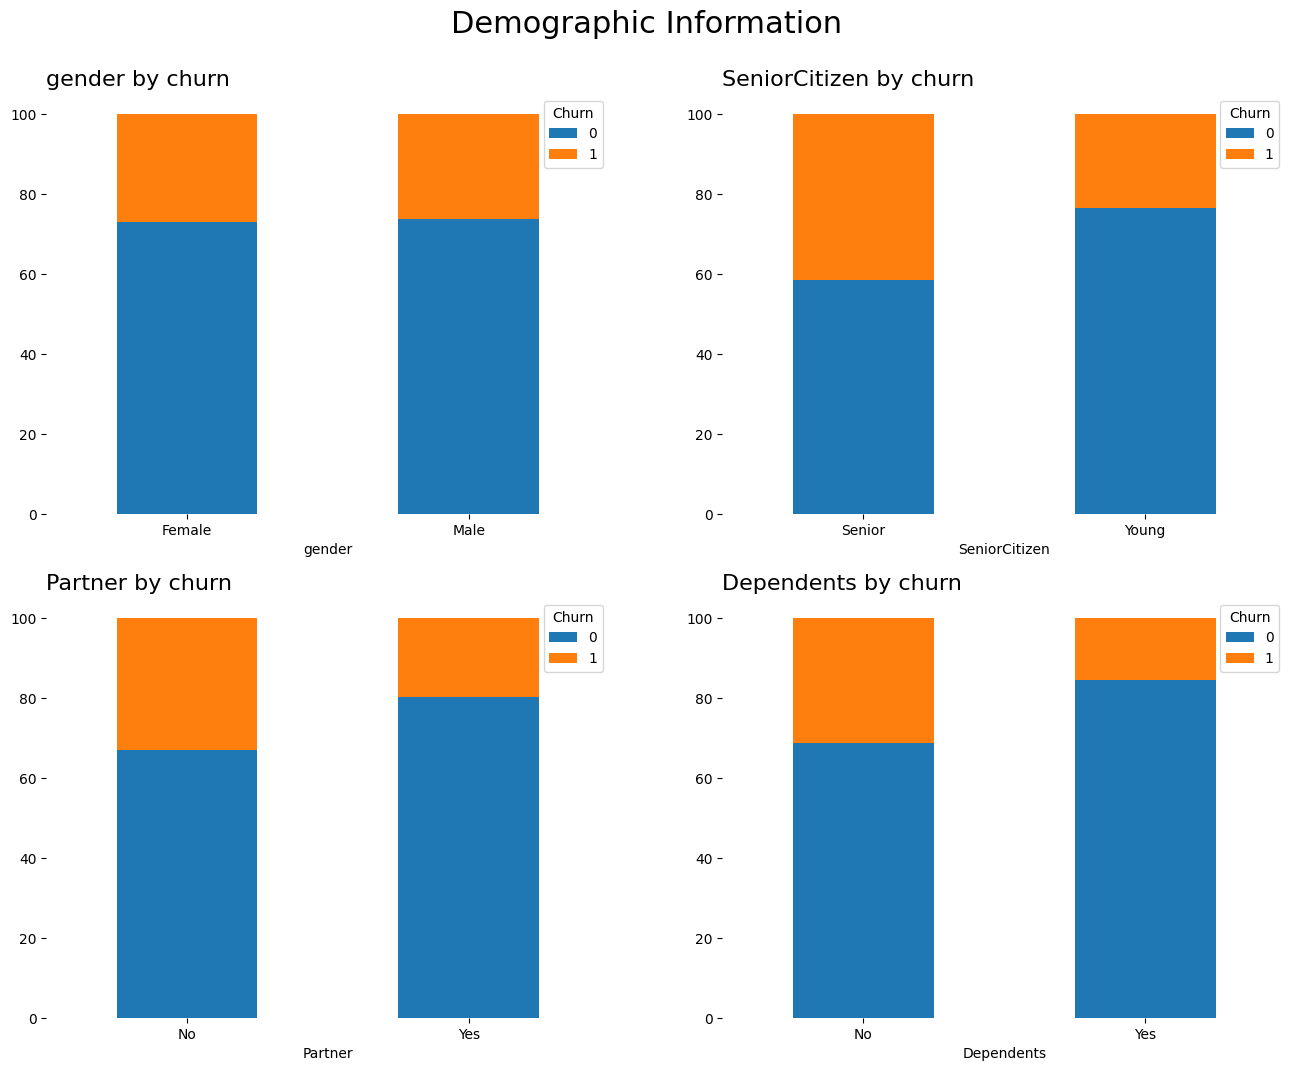

In [17]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')

The churn rate of senior citizens is almost double that of young citizens.
We do not expect gender to have significant predictive power. A similar percentage of churn is shown both when a customer is a man or a woman.
Customers with a partner churn less than customers with no partner.

## Customer Account Information

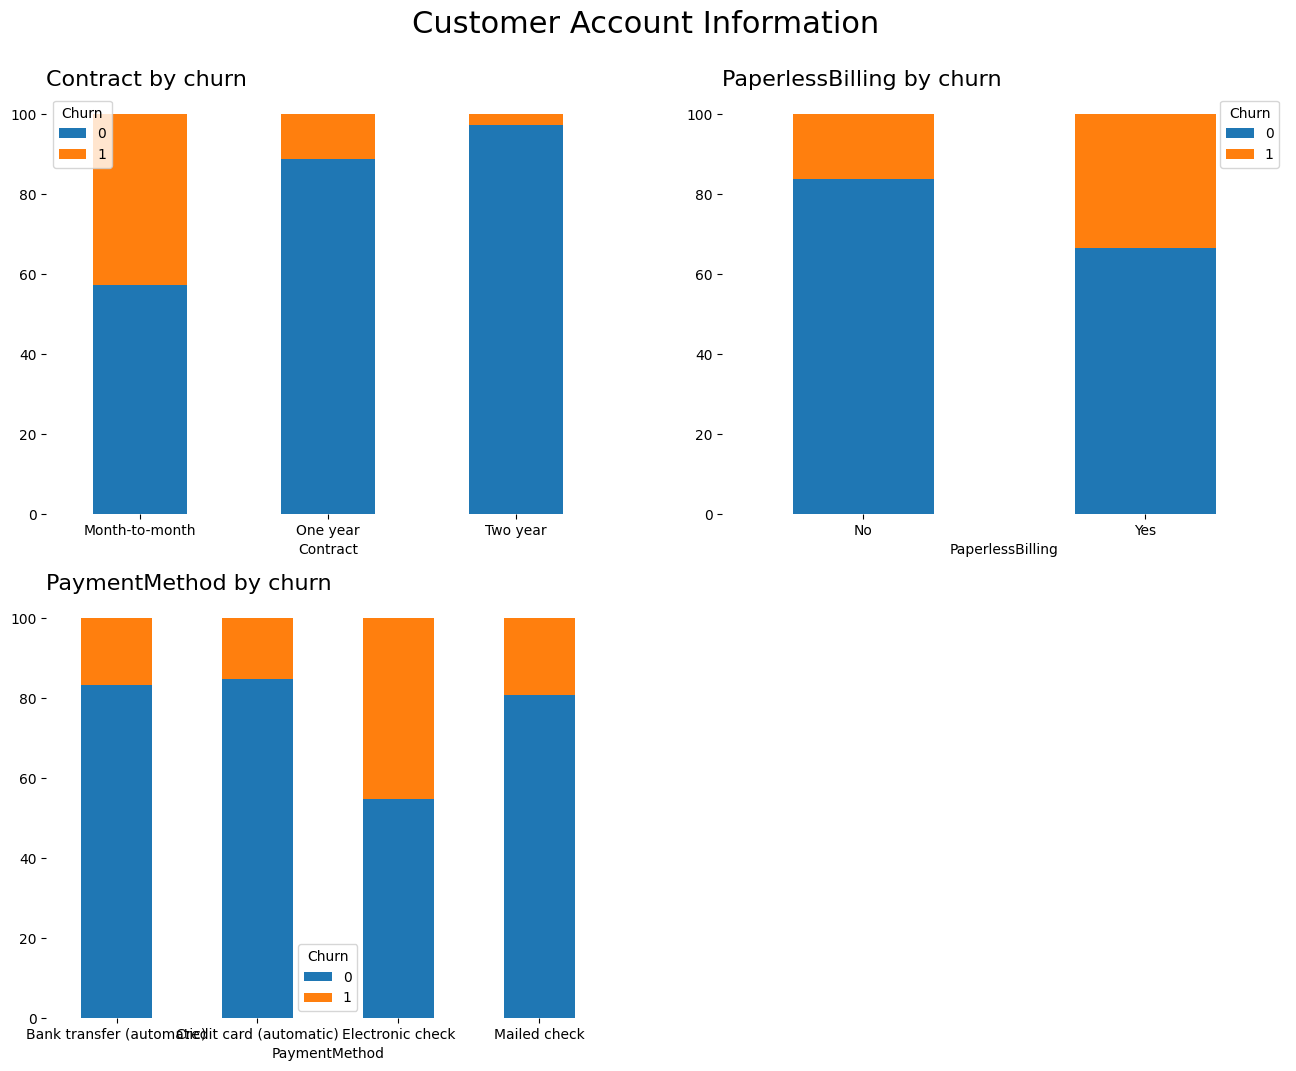

In [18]:
# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.<br>
Customers who opted for an electronic check as paying method are more likely to leave the company.<br>
Customers subscribed to paperless billing churn more than those who are not subscribed.<br>

In [19]:
df.groupby(['SeniorCitizen', 'gender'])['Churn'].value_counts(normalize=True).to_frame()

proportion
SeniorCitizen gender Churn            
0             Female 0            0.76
                     1            0.24
              Male   0            0.77
                     1            0.23
1             Female 0            0.58
                     1            0.42
              Male   0            0.59
                     1            0.41

From the visualization above, we can see that the churn and retain ratio for senior citizens, both male, and female is almost the same. Likewise, the churn and retain ratio for non-senior citizens. But if we look, the churn ratio has increased in senior citizens when compared to non-senior citizens.

## Demographic Information

In [20]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

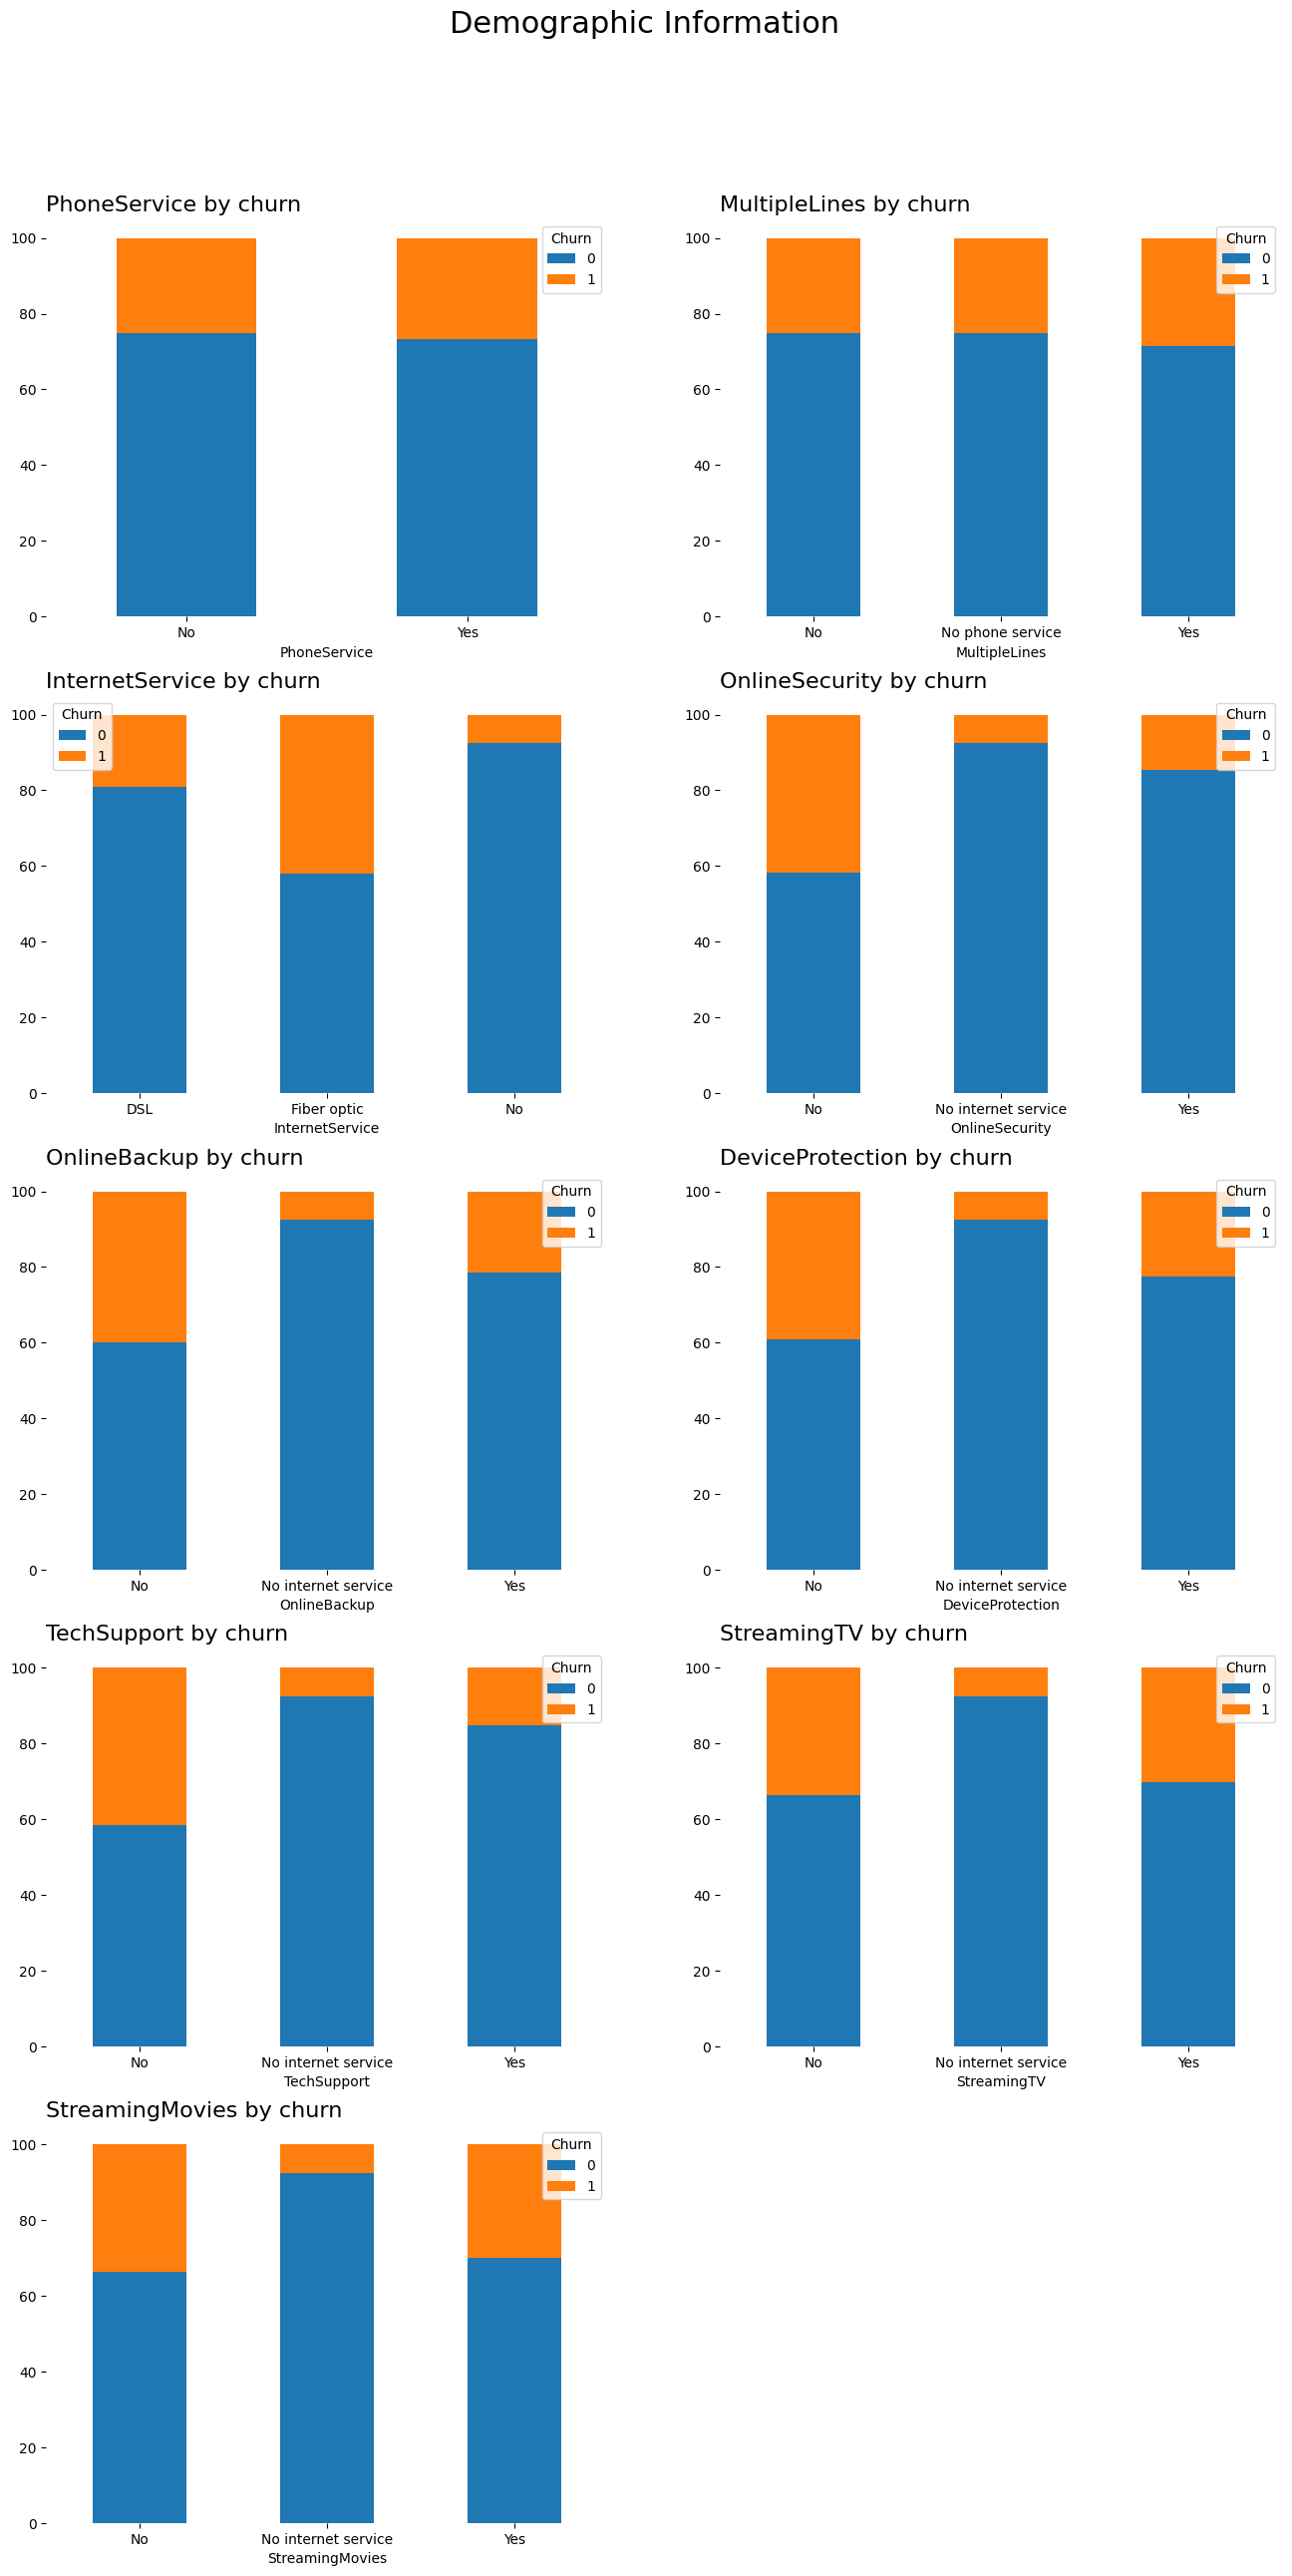

In [21]:
# stacked plot of demographic columns
percentage_stacked_plot(services, 'Demographic Information')

PhoneService and MultipleLines no significant predictive power
<br>
Internet service - Fiber Optic churn a lot (internet service)
<br>
Rest of services same - no internet service churn the least and then those with a service churn less than those without it. 

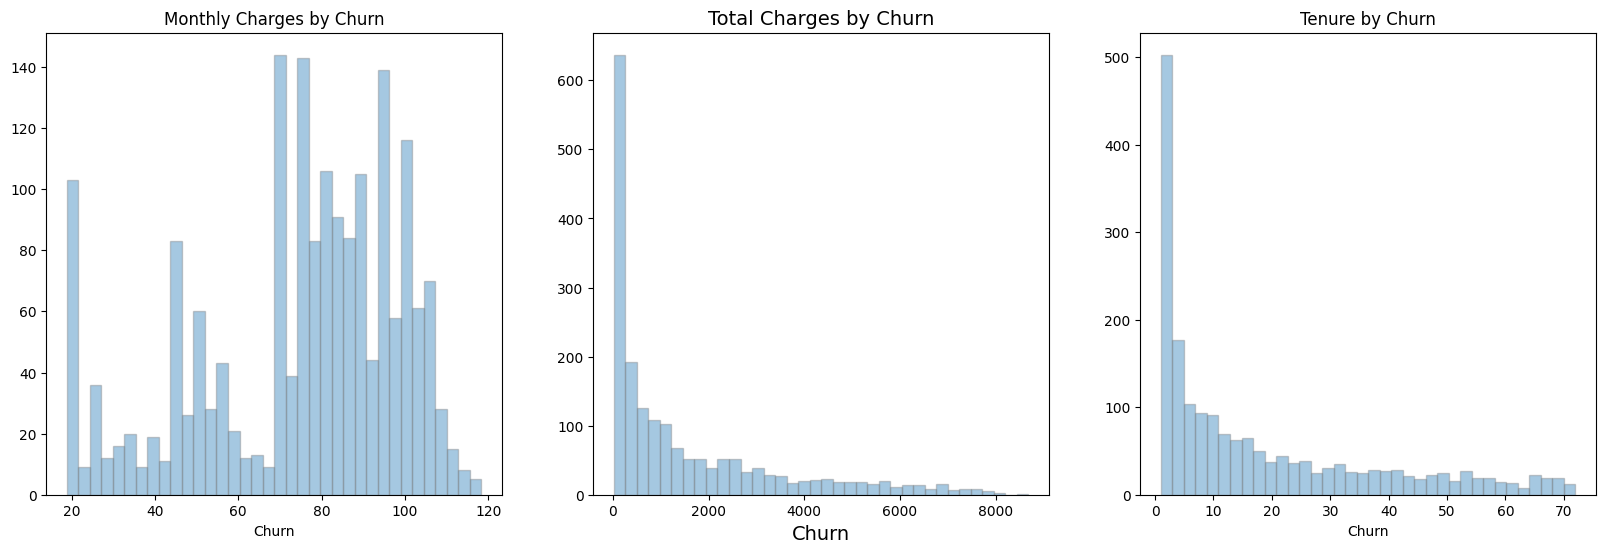

In [22]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize = (20,6))

ax = sns.distplot(df[df['Churn']==1]['MonthlyCharges'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'gray'},
                   kde_kws={'linewidth': 10},
                 ax=ax1)
ax.set_xlabel('Churn')
ax.set_title('Monthly Charges by Churn')

ax = sns.distplot(df[df['Churn']==1]['TotalCharges'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'gray'},
                   kde_kws={'linewidth': 10},
                 ax=ax2)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Total Charges by Churn',size = 14)
ax = sns.distplot(df[df['Churn']==1]['tenure'],
                   hist=True, kde=False,
                   bins=int(180/5),
                   hist_kws={'edgecolor':'gray'},
                   kde_kws={'linewidth': 10},
                 ax=ax3)

ax.set_xlabel('Churn')
ax.set_title('Tenure by Churn')
pass

The churn rate tends to be larger when monthly charges are high.<br>
New customers (low tenure) are more likely to churn.<br>
Clients with high total charges are less likely to leave the company

# ML

In [23]:
#encoded_df

In [24]:
# select independent variables
X = encoded_df.drop(columns='Churn')

# select dependent variables
y = encoded_df.loc[:, 'Churn']

In [25]:
#Scaling the data
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [26]:
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=101)

### Lazy Predict

In [27]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)

# Train the model and get the predictions
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print the models and their performance scores
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:17<00:00,  1.69it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score   
Model                                                                           
SGDClassifier                      0.76               0.74     0.74      0.77  \
NearestCentroid                    0.70               0.74     0.74      0.72   
GaussianNB                         0.69               0.73     0.73      0.71   
BernoulliNB                        0.71               0.73     0.73      0.73   
LogisticRegression                 0.81               0.73     0.73      0.81   
LinearDiscriminantAnalysis         0.81               0.72     0.72      0.80   
LinearSVC                          0.81               0.72     0.72      0.81   
AdaBoostClassifier                 0.81               0.72     0.72      0.80   
CalibratedClassifierCV             0.81               0.72     0.72      0.80   
SVC                                0.81               0.72     0.72      0.80   
LGBMClassifier              

Accuracy: The proportion of correct predictions over the total number of predictions.<br>
F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall, and is useful when there is an uneven class distribution.<br>
AUC-ROC: The area under the receiver operating characteristic (ROC) curve. It measures the ability of the model to distinguish between positive and negative classes.

## Logistic Regression

In [28]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [29]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1052
         1.0       0.66      0.55      0.60       355

    accuracy                           0.81      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.81      0.81      1407



In [30]:
print(accuracy_score(y_test, lr.predict(X_test)))

0.814498933901919


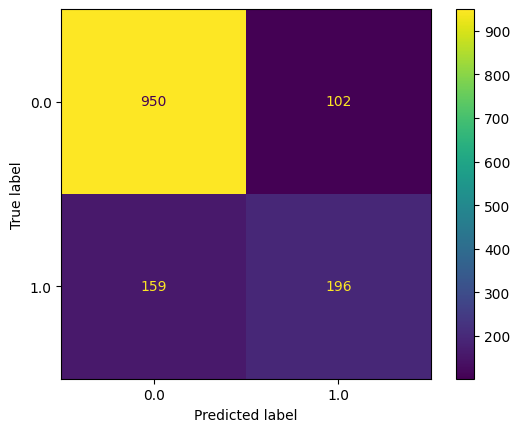

In [31]:
cm = confusion_matrix(y_test, lr.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot()
plt.show()

## Random Forest

In [32]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
print(accuracy_score(y_test, rf.predict(X_test)))

0.7896233120113717


In [34]:
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1052
         1.0       0.60      0.52      0.55       355

    accuracy                           0.79      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



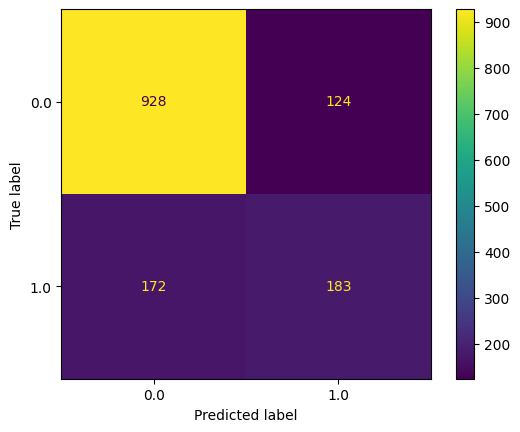

In [35]:
cm = confusion_matrix(y_test, rf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf.classes_)
disp.plot()
plt.show()

## SGD Classifier

In [36]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)

SGDClassifier()

In [37]:
print(accuracy_score(y_test, sgdc.predict(X_test)))

0.7889125799573561


In [38]:
print(classification_report(y_test, sgdc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.79      0.97      0.87      1052
         1.0       0.73      0.26      0.38       355

    accuracy                           0.79      1407
   macro avg       0.76      0.61      0.63      1407
weighted avg       0.78      0.79      0.75      1407



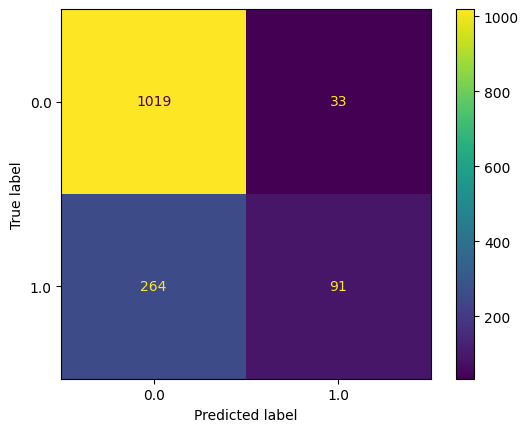

In [39]:
cm = confusion_matrix(y_test, sgdc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sgdc.classes_)
disp.plot()
plt.show()

## Nearest Centroid

In [40]:
nc = NearestCentroid()
nc.fit(X_train, y_train)

NearestCentroid()

In [41]:
print(accuracy_score(y_test, nc.predict(X_test)))

0.6993603411513859


In [42]:
print(classification_report(y_test, nc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.67      0.77      1052
         1.0       0.45      0.79      0.57       355

    accuracy                           0.70      1407
   macro avg       0.67      0.73      0.67      1407
weighted avg       0.79      0.70      0.72      1407



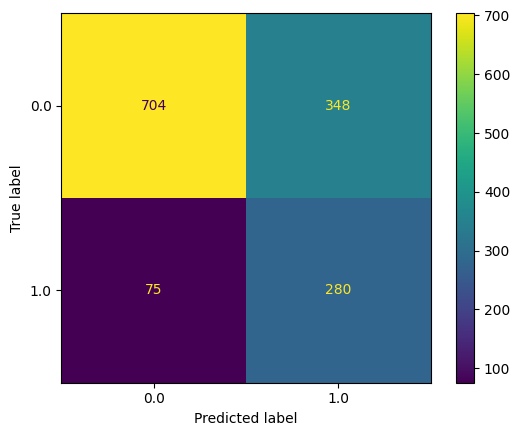

In [43]:
cm = confusion_matrix(y_test, nc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nc.classes_)
disp.plot()
plt.show()

### After training the models, we only use the best ones for the final ensemble classifier

In [44]:
vc = VotingClassifier(estimators=[("nc", nc),("sgdc", sgdc),("lr", lr)])
vc.fit(X_train, y_train)

VotingClassifier(estimators=[('nc', NearestCentroid()),
                             ('sgdc', SGDClassifier()),
                             ('lr', LogisticRegression())])

In [45]:
print(accuracy_score(y_test, vc.predict(X_test)))

0.8024164889836531


In [46]:
print(classification_report(y_test, vc.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.88      0.87      1052
         1.0       0.62      0.57      0.59       355

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407



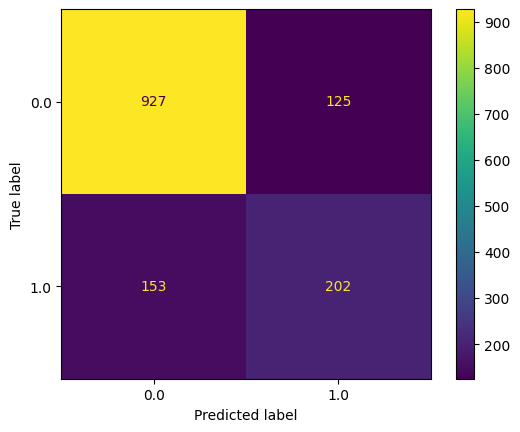

In [47]:
cm = confusion_matrix(y_test, vc.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=vc.classes_)
disp.plot()
plt.show()

In [48]:
stacking_clf = StackingClassifier(estimators=[("nc", nc),("sgdc", sgdc),("lr", lr)], final_estimator=lr)
stacking_clf.fit(X_train, y_train)

StackingClassifier(estimators=[('nc', NearestCentroid()),
                               ('sgdc', SGDClassifier()),
                               ('lr', LogisticRegression())],
                   final_estimator=LogisticRegression())

In [49]:
print(accuracy_score(y_test, stacking_clf.predict(X_test)))

0.8137882018479033


In [50]:
print(classification_report(y_test, stacking_clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      1052
         1.0       0.67      0.51      0.58       355

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



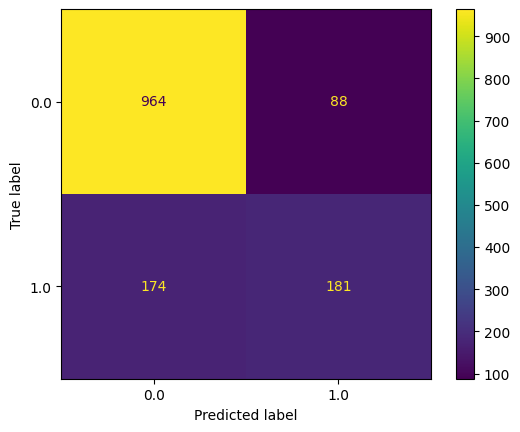

In [51]:
cm = confusion_matrix(y_test, stacking_clf.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=stacking_clf.classes_)
disp.plot()
plt.show()

# Cross Validation and ML Flow

In [52]:
best_params = {}

In [53]:
mlflow.set_tracking_uri('http://localhost:5000')
mlflow.set_experiment('E1')

<Experiment: artifact_location='mlflow-artifacts:/958913268758288135', creation_time=1683728529469, experiment_id='958913268758288135', last_update_time=1683728529469, lifecycle_stage='active', name='E1', tags={}>

Classification report for nearestcentroid_cross_validated:
              precision    recall  f1-score   support

         0.0       0.91      0.66      0.76      1052
         1.0       0.44      0.80      0.57       355

    accuracy                           0.69      1407
   macro avg       0.67      0.73      0.67      1407
weighted avg       0.79      0.69      0.71      1407

nearestcentroid: Best params: {'metric': 'cosine', 'shrink_threshold': 0.3} (Best score: 0.74)
Classification report for sdgclassifier_cross_validated:
              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      1052
         1.0       0.75      0.31      0.44       355

    accuracy                           0.80      1407
   macro avg       0.78      0.64      0.66      1407
weighted avg       0.79      0.80      0.77      1407

sdgclassifier: Best params: {'alpha': 0.0001, 'loss': 'hinge', 'max_iter': 6000, 'penalty': 'l1'} (Best score: 0.73)
Classification rep

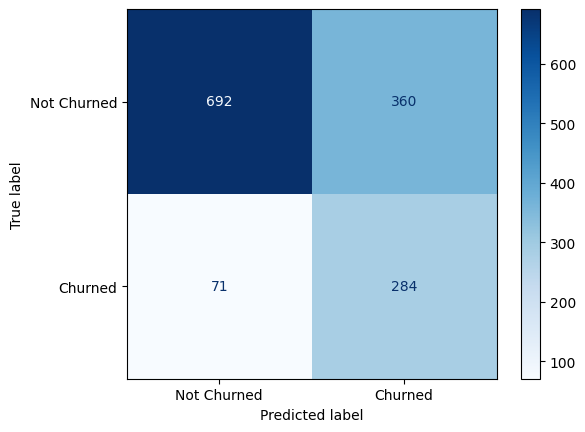

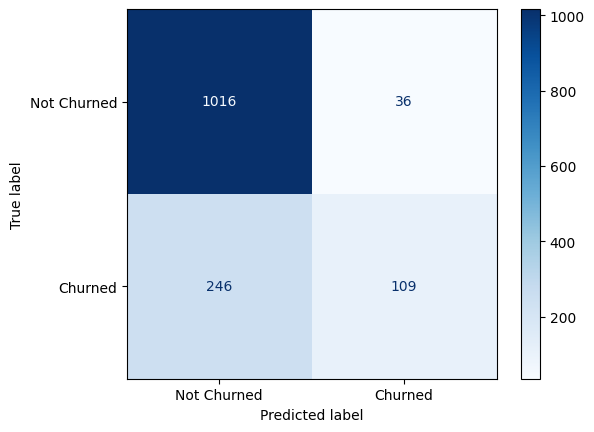

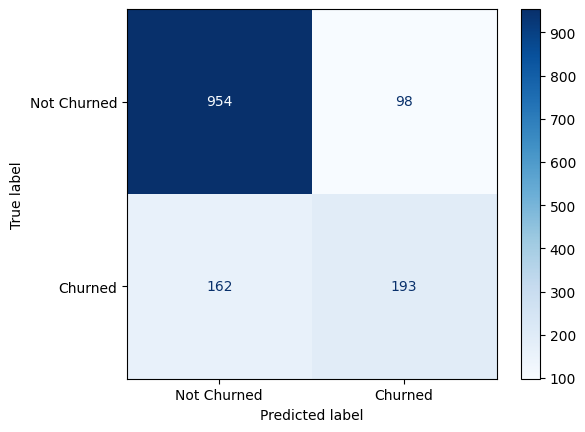

In [54]:
#Addint the 3 cved models to mlflow

models = [
    ('nearestcentroid', NearestCentroid(), {"metric": ["euclidean", "manhattan", "cosine"], "shrink_threshold": [None, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8]}),
    ('sdgclassifier', SGDClassifier(), {'loss': ['hinge', 'log', 'modified_huber', 'perceptron'],
                                        'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'max_iter': [1000, 3000, 5000, 6000, 10000]}),
    ('logisticregression', LogisticRegression(), {'penalty': ['l1', 'l2', 'elasticnet'],
                                                   'C': [0.1, 1, 10, 100, 1000],
                                                   'solver': ['saga', 'liblinear']})
]
with mlflow.start_run():
    ml_run_id = mlflow.active_run().info.run_id
    # Perform cross validation for each model
    for name, model, params in models:
        skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
        grid_search = GridSearchCV(model, params, cv=skfold, scoring='balanced_accuracy')
        grid_search.fit(X, y)
        best_params[name] = grid_search.best_params_
        #mlflow.log_param("model_{}_cross_validated".format(name), name)
        mlflow.log_metric("best_balanced_accuracy_score_{}_cross_validated".format(name), grid_search.best_score_)
        mlflow.log_param("best_params_{}".format(name), grid_search.best_params_)
        
        # Log the classification report
        report = classification_report(y_test, grid_search.predict(X_test))
        print(f"Classification report for {name}_cross_validated:\n{report}")
        mlflow.log_text(text=report, artifact_file="model_{}/classification_report_cross_validated.txt".format(name))
        
        # Log the confusion matrix
        cm = confusion_matrix(y_test, grid_search.predict(X_test))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
        disp.plot(cmap='Blues')
        mlflow.log_figure(disp.figure_, 'model_{}/confusion_matrix_cross_validated.png'.format(name))
        
        print(f'{name}: Best params: {grid_search.best_params_} (Best score: {grid_search.best_score_:.2f})')
        
        # Log the best model
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"model_{name}")

In [55]:
# Define the new models with best hyper params
lr_best = LogisticRegression(**best_params["logisticregression"])
nc_best = NearestCentroid(**best_params["nearestcentroid"])
sdg_best = SGDClassifier(**best_params["sdgclassifier"])

In [59]:
print(best_params["nearestcentroid"])

{'metric': 'cosine', 'shrink_threshold': 0.3}


In [56]:
# Define the hyperparameter grid for the VotingClassifier and StackingClassifier
ensemble_models = [
    ('voting_classifier', VotingClassifier(estimators=[('lr', lr_best), ('nc', nc_best), ('sdg', sdg_best)]), {'voting': ['hard', 'soft']}),
    ('stacking_classifier', StackingClassifier(estimators=[('lr', lr_best), ('nc', nc_best), ('sdg', sdg_best)]), {'final_estimator': [LinearSVC(), GaussianNB(), BernoulliNB(), LinearDiscriminantAnalysis(), LinearSVC(), SVC(), AdaBoostClassifier(), RandomForestClassifier(), CalibratedClassifierCV(), LGBMClassifier(), RidgeClassifier(), RidgeClassifierCV()], 'stack_method': ['auto', 'predict_proba']}),
]

Classification report for voting_classifier_cross_validated:
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88      1052
         1.0       0.66      0.54      0.60       355

    accuracy                           0.82      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407

voting_classifier: Best params: {'voting': 'hard'} (Best score: 0.73)
Classification report for stacking_classifier_cross_validated:
              precision    recall  f1-score   support

         0.0       0.90      0.78      0.83      1052
         1.0       0.53      0.74      0.62       355

    accuracy                           0.77      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.77      0.78      1407

stacking_classifier: Best params: {'final_estimator': GaussianNB(), 'stack_method': 'auto'} (Best score: 0.76)


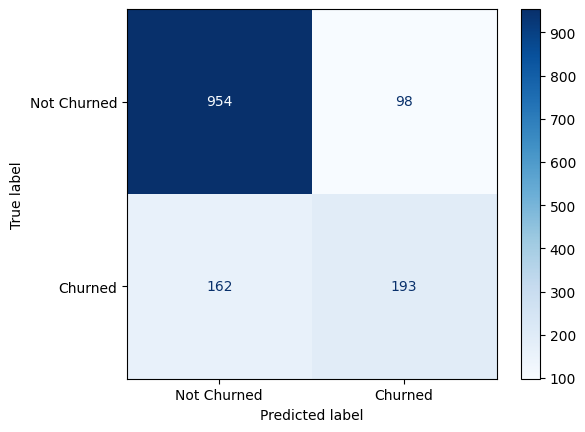

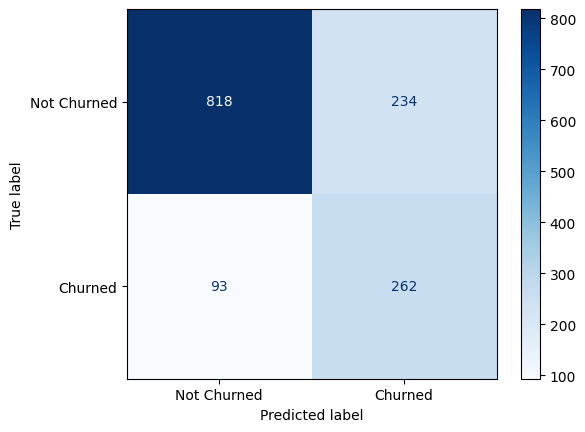

In [57]:
with mlflow.start_run(ml_run_id):
     # Perform cross validation for each model
    for name, model, params in ensemble_models:
        grid_search = GridSearchCV(model, params, cv=skfold, scoring='balanced_accuracy')
        
        grid_search.fit(X, y)
        best_params[name] = grid_search.best_params_
        #mlflow.log_param("model_{}_cross_validated".format(name), name)
        mlflow.log_metric("best_balanced_accuracy_score_{}_cross_validated".format(name), grid_search.best_score_)
        mlflow.log_param("best_params_{}".format(name), grid_search.best_params_)
        
        # Log the classification report
        report = classification_report(y_test, grid_search.predict(X_test))
        print(f"Classification report for {name}_cross_validated:\n{report}")
        mlflow.log_text(text=report, artifact_file="model_{}/classification_report_cross_validated.txt".format(name))
        
        # Log the confusion matrix
        cm = confusion_matrix(y_test, grid_search.predict(X_test))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
        disp.plot(cmap='Blues')
        mlflow.log_figure(disp.figure_, 'model_{}/confusion_matrix_cross_validated.png'.format(name))
        
        print(f'{name}: Best params: {grid_search.best_params_} (Best score: {grid_search.best_score_:.2f})')
        
        # Log the best model
        mlflow.sklearn.log_model(grid_search.best_estimator_, f"model_{name}")